# Введение в методы оптимизации для анализа данных

## План на сегодня

- Постановки задач оптимищации и ключевые определения
- Примеры приложений
- Простейшие методы численного решения задач оптимизации

## Постановка задачи оптимизации

- Необходимо найти минимум некоторой функции в заданной области
- Формально записывается следующим образом

\begin{align*}
& \min f(x) \\
\text{s.t. } & x \in X
\end{align*}

или 

\begin{align*}
& \min f(x) \\
\text{s.t. } & g_i(x) = 0\\
& h_j(x) \leq 0
\end{align*}

### Пример: задача о планировании рациона минимальной стоимости

- Дан набор продуктов: хлеб, молоко, мясщ, крупы, овощи и тд
- Известна цена единицы каждого продукта $c_i$
- Известно сколько калорий приносит потребление единицы каждого продукта $k_i$
- Также известно, какое минимальное и максимальное количество калорий нужно получить $F_{\min}$ и $F_{\max}$
- Также известно какие минимальное и максимальное количество каждого продукта доступно $N_{\min}$ и $N_{\max}$
- Задача: потратить как можно меньше денег на продукты при заданных ограничениях

### Как выглядит задача оптимизации?

- Хотим найти вектор $x$ такой что $x_i$ - количество единиц $i$-го продукта
- Стоимость всех продуктов $\sum_{i=1}^n c_i x_i = c^{\top}x$
- Ограничения: 
    - $N_{\min} \leq x_i \leq N_{\max}$
    - $F_{\min} \leq k^{\top}x \leq F_{\max}$
- Если предположить, что количество может быть только целым, то появится новое ограничение $x_i \in \mathbb{Z}_+$

## Определения

- Функция $f$ - целевая функция
- Функции $g_i$ - ограничения типа равенств
- Функции $h_j$ - ограничения типа неравенств

## Какие решения бывают?

- Локальный минимум: точка $x^*$ является точкой **локального** минимума, если $f(x^*) \leq f(x)$ для всех $x$ в некоторой окрестности $x^*$

- Глобальный минимум: точка $x^*$ является точкой **глобального** минимума, если $f(x^*) \leq f(x)$ для всех $x$ из области определения $f$

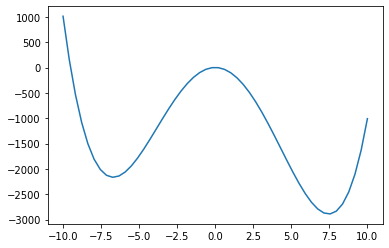

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
f = lambda x: x**4 - x**3 - 100*x**2 - x + 1
plt.plot(x, f(x))

**Q1**: как определит ьлокальный и глобальный максимум?

**Q2**: как свести задачу максимизации к задаче минимизации?

## Примеры задач оптимизации в анализе данных

Базовые:
- классификация
- регрессия
- кластеризация
- построение рекомендательных систем

Более сложные:
- ранжирование
- генерация изображений, текста и звука
- диалоговые системы
- и многие многие другие




## Какой самый простой метод поиска решения задачи оптимизации вы можете предложить?

 ## Поиск по сетке или полный перебор

 - Идея: последовательно перебрать все возможные точки, которые могут оказаться решением и выбрать ту точку, в которой значение целевой функции минимально  

In [39]:
N_test = 10000
x_test = np.linspace(-10, 10, N_test)
f_test = f(x_test)
idx_min = np.argmin(f_test)
print(x_test[idx_min], f(x_test[idx_min]))

7.457745774577457 -2889.6808319109277


In [40]:
# Exact solution
import scipy.optimize as scopt
x_opt = scopt.minimize_scalar(f, bounds=(-10, 10))
print(x_opt.x, f(x_opt.x), )

7.458370979306252 -2889.6809145308193


## Какие недостатки есть у такого подхода?

## Как удостовериться, что точка выданная методом действительно является решением?

- В этом помогают условия оптимальности, то есть некоторые утверждения, проверка корректности которых позволяет ответить на вопрос: **является ли данная точка локальным минимумом?**
- Если можно вычислить производную, то 
    - если точка является локальным минимумом, то производная в ней равна 0
    - если в некоторой точке производная равна 0 и вторая производная положительна, то это точка локального минимума

- Рассмотрим наш тестовый пример
- $f(x) = x^4 - x^3 - 100x^2 - x + 1$
- $f'(x) = 4x^3 - 3x^2 - 200x - 1$
- $f''(x) = 12x^2 - 6x - 200$



In [43]:
f_prime = lambda x: 4 * x**3 - 3 * x**2 - 200 * x - 1
f_dprime =  lambda x: 12 * x**2 - 6 * x - 200
print(f_prime(x_test[idx_min]), f_prime(x_opt.x))
print(f_dprime(x_test[idx_min]), f_dprime(x_opt.x))

-0.26428719552950497 1.3900798876420595e-06
422.66918981127026 422.77734610365485


## Метод случайного поиска

- Вместо поиска по сетке сэмпилруем случаные точки, вычисляем в них значения и запоминаем точку, в которой значение наименьшее

- Может оказаться точнее для задач высокой размерности, где поиск по сетке чрезвычайно вычислительно затратен


### Функция Растригина

- Много локальных минимумов

$$ f(x) = 10n + \sum_{i=1}^n (x_i^2 - 10\cos(x_i)), \quad x_i \in [-5.12, 5.12]$$ 

- Известен глобальный минимум $f(0) = 0$

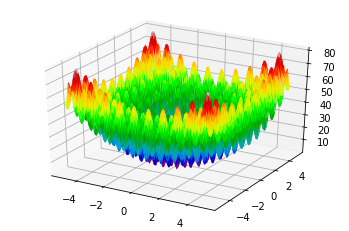

In [46]:
from matplotlib import cm 
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    

In [62]:
rastrigin = lambda x: 10 * x.shape[0] + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))
print(rastrigin(np.zeros(10)))

0.0


In [73]:
n = 2
# n = 4
x_bf = scopt.brute(rastrigin, [(-5.12, 5.12) for i in range(n)], Ns=100)
print(x_bf, rastrigin(x_bf))

[-6.17099338e-05 -2.77525006e-06] 7.570280828872455e-07


In [76]:
N_random = 10**5
n = 3
random_test_x = 5.12 * (2 * np.random.rand(N_random, n) - 1)
f_random = np.zeros(N_random)
for i in range(N_random):
    f_random[i] = rastrigin(random_test_x[i])

In [77]:
idx_in = np.argmin(f_random)
print(random_test_x[idx_in], rastrigin(random_test_x[idx_in]))

[0.01805787 0.03279085 0.07111453] 1.2640180169236785


## Более продвинутые методы случайного поиска

- генетические алгоритмы
- алгоритм роя частиц
- другие методы, имитирующие поведение природных сообществ

## Если функция дифференцируема и нам достаточно получить локальный минимум...

- Можно показать, что направление $-f'(x)$ ведёт к точкам, в которых значение функции меньше, чем в точке $x$
- Это приводит к идее градиентного спуска

$$ x_{k+1} = x_k - \alpha_k f'(x_k), $$

где $\alpha_k > 0$ некоторый размер шага

- В общем случае градиентный спуск сходится в **стационарную** точку функции, то есть в такую точку, где градиент равен 0.

**Q:** всегда ли это точка минимума?

## Пример: квадратичная функция

- Решаем задачу 

$$ f(x) = \frac12 x^{\top}Ax - b^{\top}x \to \min_x, $$

где $A ≻ 0$.

- Из лекций про линейную алгебру известно, что градиент этой функции равен 

$$ f'(x) = Ax - b $$

- Тогда условие оптимальности $f'(x^*) = 0$ сводится к задаче $Ax^* = b$

- То есть задача оптимизации свелась к задаче решения системы линейных уравнений

- Этот приём является достаточно пролдуктивным для установления связей между методами решения линейных и нелинейных уравнений и методами оптимизации

## Выводы

- Постановки задач оптимизации
- Приложения и моделирование
- Простейшие методы поиска приближённого решения
- Градиентный спуск